# Chapter 2. 데이터와 표본분포

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import t

from sklearn.utils import resample

path = 'c:/reposit/data/book/practicalstatistics/'

In [2]:
# 데이터 불러오기
# loans_income = pd.read_csv(path + 'loans_income.csv', squeeze=True)
loans_income = pd.read_csv(path + 'loans_income.csv').squeeze()
nflx = pd.read_csv(path + 'sp500_data.csv.gz').NFLX

## 2.1 임의표본추출과 표본편향

## 2.2 선택편향

## 2.3 통계학에서의 표본분포

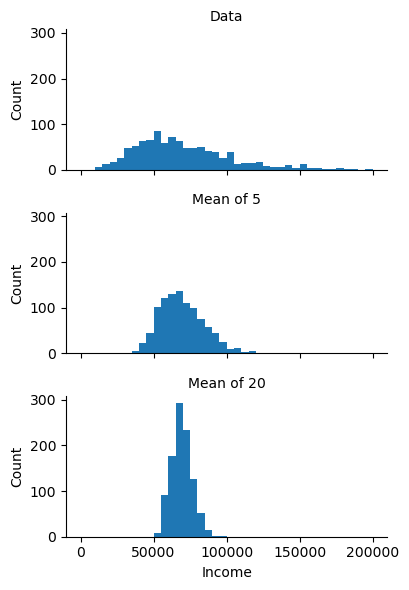

In [3]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data'
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.show()

## 2.4 부트스트랩

In [4]:
# 부트스트랩
results = []

for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())

results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.median() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: 0.0
std. error: 201.63301342563625


In [5]:
# 부트스트랩 파이썬으로 구핸해보기
# 원래 데이터 샘플
original_data = np.array([23, 45, 56, 12, 9, 38, 56, 48, 20, 8])

# 부트스트랩 샘플을 위한 반복 횟수
n_bootstrap_samples = 1000

# 부트스트랩 샘플의 평균을 저장할 리스트
bootstrap_means = []

for _ in range(n_bootstrap_samples):
    # 복원 추출로 부트스트랩 샘플 생성
    bootstrap_sample = np.random.choice(original_data, size=len(original_data), replace=True)
    
    # 부트스트랩 샘플의 평균 계산
    bootstrap_mean = np.mean(bootstrap_sample)
    
    # 계산한 평균을 리스트에 저장
    bootstrap_means.append(bootstrap_mean)

# 부트스트랩으로 얻은 평균의 분포에서 신뢰구간 계산
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"원래 데이터 샘플의 평균: {np.mean(original_data):.2f}")
print(f"부트스트랩 평균의 95% 신뢰구간: ({lower_bound:.2f}, {upper_bound:.2f})")

원래 데이터 샘플의 평균: 31.50
부트스트랩 평균의 95% 신뢰구간: (19.80, 42.80)


## 2.5 신뢰구간

## 2.6 정규분포

In [6]:
# 개별 데이터 포인트의 Z-점수 구하기
# 데이터 샘플
data = np.array([23, 45, 56, 12, 9, 38, 56, 48, 20, 8])

# 데이터 샘플의 평균과 표준편차 계산
mean = np.mean(data)
std_dev = np.std(data)

# 특정 데이터 포인트 (예: 45)
data_point = 45

# Z-점수 계산
z_score = (data_point - mean) / std_dev

print(f"Z-score of {data_point}: {z_score}")

Z-score of 45: 0.73863184972605


In [7]:
# 전체 데이터 샘플의 Z-점수 구하기
# 데이터 샘플
data = np.array([23, 45, 56, 12, 9, 38, 56, 48, 20, 8])

# 데이터 샘플의 평균과 표준편차 계산
mean = np.mean(data)
std_dev = np.std(data)

# 전체 데이터의 Z-점수 계산
z_scores = (data - mean) / std_dev

print(f"Z-scores of the data: {z_scores}")

Z-scores of the data: [-0.4650645   0.73863185  1.34048002 -1.06691267 -1.23105308  0.35563756
  1.34048002  0.90277226 -0.62920491 -1.28576655]


### 2.6.1 표준정규분포와 QQ 그림

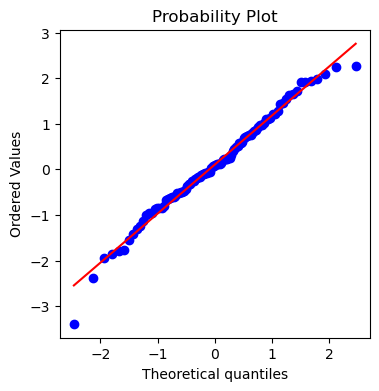

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.show()

## 2.7 긴 꼬리 분포

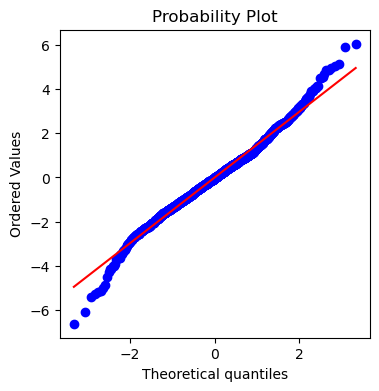

In [9]:
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.show()

## 2.8 스튜던트의 t 분포

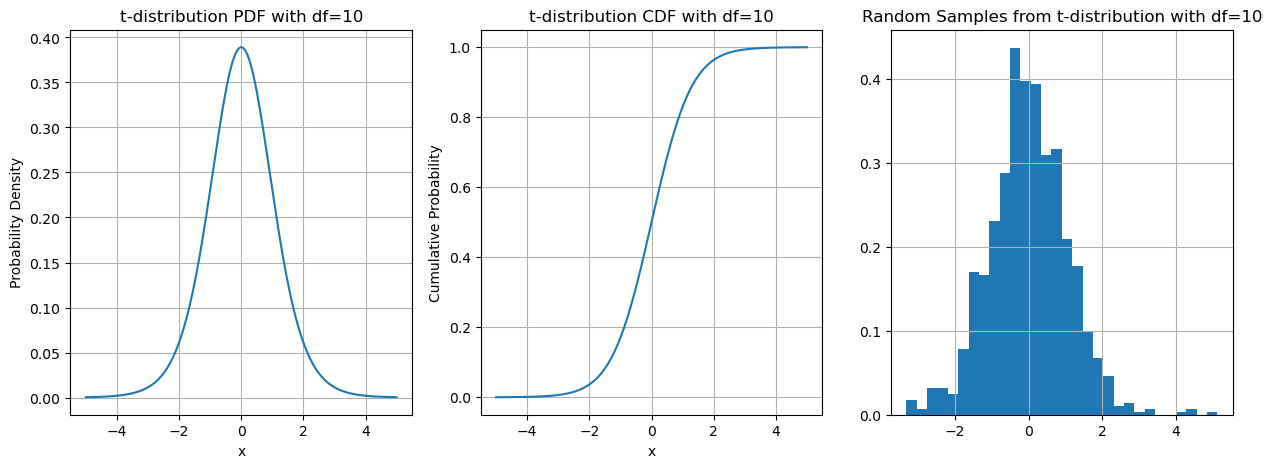

In [34]:
# 자유도 설정 (예: 10)
df = 10

# PDF (확률밀도함수) 계산 및 그래프 그리기
x = np.linspace(-5, 5, 1000)
pdf_vals = t.pdf(x, df)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title(f"t-distribution PDF with df={df}")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.plot(x, pdf_vals)
plt.grid(True)

# CDF (누적분포함수) 계산 및 그래프 그리기
cdf_vals = t.cdf(x, df)

plt.subplot(1, 3, 2)
plt.title(f"t-distribution CDF with df={df}")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.plot(x, cdf_vals)
plt.grid(True)


# 랜덤 샘플 생성 (예: 1000개)
random_samples = t.rvs(df, size=1000)

plt.subplot(1, 3, 3)
plt.title(f"Random Samples from t-distribution with df={df}")
plt.hist(random_samples, bins=30, density=True)
plt.grid(True)
plt.show()

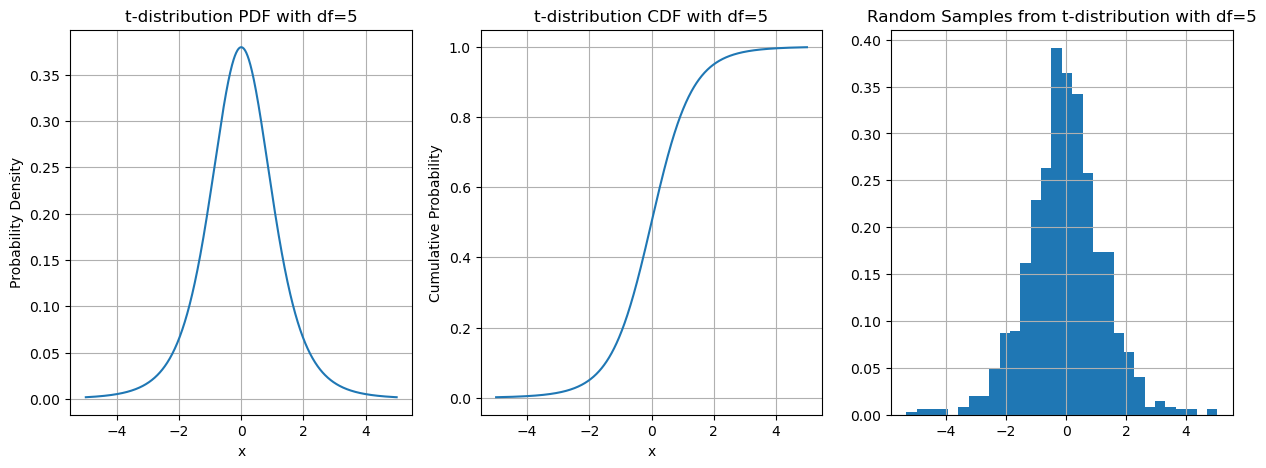

In [35]:
# 자유도 설정 5
df = 5

# PDF (확률밀도함수) 계산 및 그래프 그리기
x = np.linspace(-5, 5, 1000)
pdf_vals = t.pdf(x, df)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title(f"t-distribution PDF with df={df}")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.plot(x, pdf_vals)
plt.grid(True)

# CDF (누적분포함수) 계산 및 그래프 그리기
cdf_vals = t.cdf(x, df)

plt.subplot(1, 3, 2)
plt.title(f"t-distribution CDF with df={df}")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.plot(x, cdf_vals)
plt.grid(True)


# 랜덤 샘플 생성 (예: 1000개)
random_samples = t.rvs(df, size=1000)

plt.subplot(1, 3, 3)
plt.title(f"Random Samples from t-distribution with df={df}")
plt.hist(random_samples, bins=30, density=True)
plt.grid(True)
plt.show()

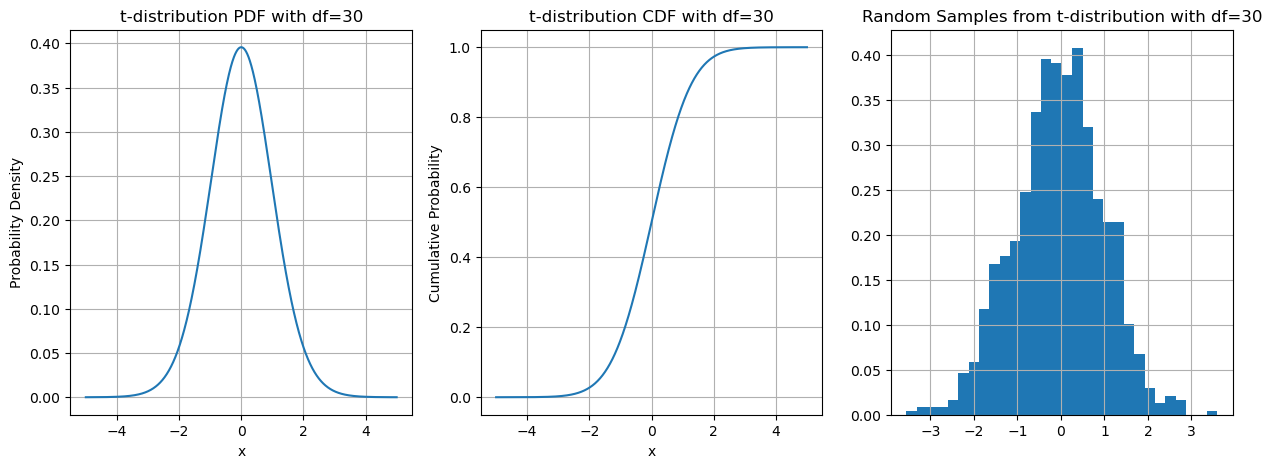

In [36]:
# 자유도 설정 30
df = 30

# PDF (확률밀도함수) 계산 및 그래프 그리기
x = np.linspace(-5, 5, 1000)
pdf_vals = t.pdf(x, df)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title(f"t-distribution PDF with df={df}")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.plot(x, pdf_vals)
plt.grid(True)

# CDF (누적분포함수) 계산 및 그래프 그리기
cdf_vals = t.cdf(x, df)

plt.subplot(1, 3, 2)
plt.title(f"t-distribution CDF with df={df}")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.plot(x, cdf_vals)
plt.grid(True)


# 랜덤 샘플 생성 (예: 1000개)
random_samples = t.rvs(df, size=1000)

plt.subplot(1, 3, 3)
plt.title(f"Random Samples from t-distribution with df={df}")
plt.hist(random_samples, bins=30, density=True)
plt.grid(True)
plt.show()

## 2.9 이항분포

In [10]:
print(stats.binom.pmf(2, n=5, p=0.1))
print(stats.binom.cdf(2, n=5, p=0.1))

0.07289999999999992
0.99144


## 2.10 카이제곱분포

## 2.11 F 분포

## 2.12 푸아송 분포와 그 외 관련 분포들

### 2.12.1 푸아송 분포

In [11]:
stats.poisson.rvs(2, size=100)

array([1, 2, 2, 3, 2, 2, 0, 0, 1, 6, 1, 2, 1, 1, 4, 3, 1, 3, 1, 0, 1, 2,
       2, 1, 0, 0, 6, 1, 0, 1, 3, 0, 3, 2, 1, 3, 4, 2, 1, 0, 4, 2, 0, 3,
       3, 3, 6, 0, 4, 2, 3, 2, 2, 0, 2, 3, 1, 2, 4, 2, 4, 4, 4, 2, 2, 1,
       4, 1, 0, 2, 0, 1, 2, 3, 3, 1, 4, 1, 1, 4, 2, 2, 3, 2, 1, 1, 3, 0,
       3, 4, 5, 1, 2, 2, 0, 1, 4, 1, 0, 0], dtype=int64)

### 2.12.2 지수분포

In [12]:
stats.expon.rvs(scale=0.2, size=100)
stats.expon.rvs(scale=5, size=100)

array([ 9.73468611,  3.13350092,  0.23217519, 12.27406983,  4.72658378,
        6.09809409,  0.85110704,  9.96491981, 19.28533509,  0.05832237,
        0.33523482,  3.81967586, 13.0362264 ,  6.1758382 , 14.42562287,
        5.12421847,  7.60803706,  1.59896571,  8.0049346 ,  1.14097173,
        1.66750681,  2.20536151, 11.34676157,  7.44925075,  8.66213798,
        1.35185384,  2.01107091, 14.65870039,  4.04502694,  0.80087882,
       11.37788855,  1.0267304 ,  4.86446061, 11.64299433,  3.399748  ,
        3.60748319,  4.21036208, 10.82814541,  0.05736017,  1.34386512,
        0.76612988,  4.69180037,  1.65109153, 10.03653233,  2.45167405,
       20.08219647,  0.45608682,  0.38518955,  4.23333193, 18.84278779,
        3.85935472,  2.29599086,  3.57142299,  1.50893194,  7.64113313,
        0.82805171,  0.41468605,  7.46515847,  2.45180688,  3.64661974,
        8.26548675,  7.09875299, 11.14557117,  0.50790098,  2.76678534,
        0.54164476,  2.75130282,  0.15509539,  0.75278901,  0.03

### 2.12.3 고장률 추정

### 2.12.4 베이불 분포

In [13]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 6014.93840943,   827.61254793,  4810.3712812 ,  6806.95731817,
        9648.71049579,  2680.40000597,  8136.5244714 ,  1096.9891305 ,
        6336.21419549,  5405.05205152,  1731.11575179,  3512.54903263,
        5446.49406984,  4872.78287123,  1979.98289876,  7527.76455056,
         668.72548465,  1751.07865936,  2894.30703347,  3537.90052094,
        6763.09584963,  2780.25911977,  3649.54955453,  1908.60068538,
        5330.26977029,  1514.45161205,  1474.94127682,  2037.87434645,
        4678.14077023,  8802.05946683,  2565.03817537,  4187.19659838,
        8060.46223643,  1749.75157682,  5697.71006407,  6068.82155604,
        2017.57138523,  4834.71211746,  3476.43021843,  2319.24637302,
       10879.14741116,  3448.97198635,  3779.69499718,  4265.64970443,
        4572.47491076,  4381.37061547, 12964.05250606,  3010.37043814,
        1024.20738866,  4072.77136804,  8625.10242754,  5615.69348598,
        6392.90097549,  5447.78327149,  1231.91519479,  5526.99913323,
      